In [1]:
import pandas as pd

# Load train data
data = pd.read_csv('../data/ml/hotel_reservations_train.csv')
X_train = data.drop('booking_status', axis=1)
y_train = data['booking_status']


In [2]:
# Load test data
data = pd.read_csv('../data/ml/hotel_reservations_test.csv')
X_test = data.drop('booking_status', axis=1)
y_test = data['booking_status']

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [4]:
# Scale data before training
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

scalers = {
    'standard': StandardScaler(),
    'min_max': MinMaxScaler(),
    'max_abs': MaxAbsScaler(),
    'robust': RobustScaler()
}

Standard Scaling
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4256
           1       0.79      0.77      0.78      2140

    accuracy                           0.86      6396
   macro avg       0.84      0.83      0.84      6396
weighted avg       0.85      0.86      0.85      6396

Accuracy: 0.86
Precision: 0.85
Recall: 0.86
F1 Score: 0.85
Balanced Accuracy: 0.83
ROC AUC: 0.83


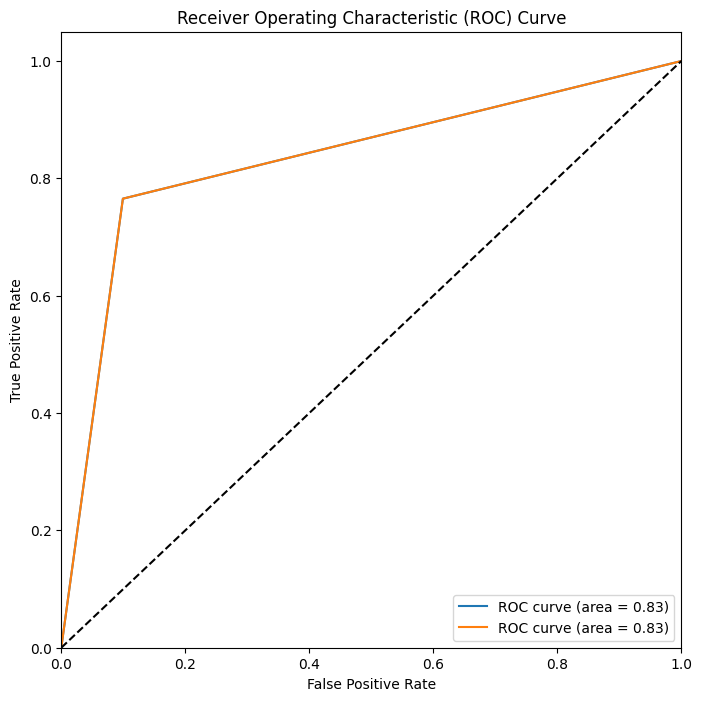

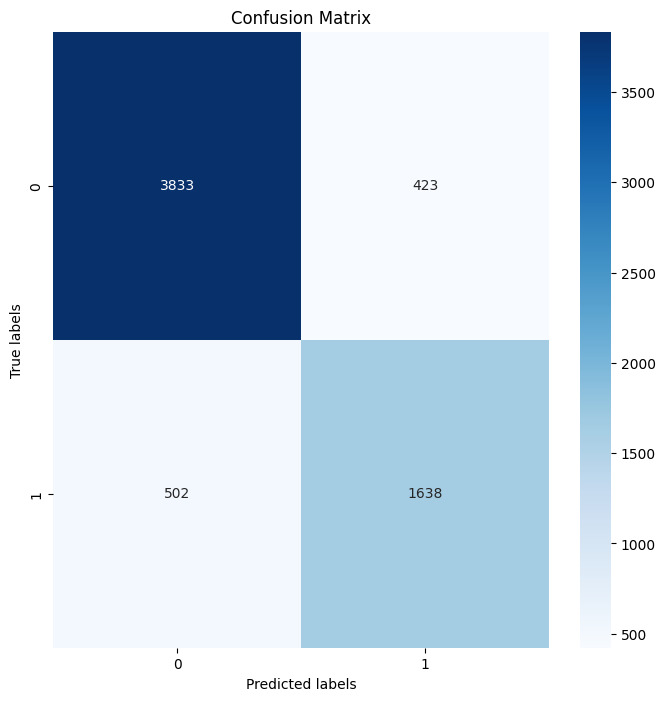

Min_max Scaling
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4256
           1       0.81      0.73      0.77      2140

    accuracy                           0.85      6396
   macro avg       0.84      0.82      0.83      6396
weighted avg       0.85      0.85      0.85      6396

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Balanced Accuracy: 0.82
ROC AUC: 0.82


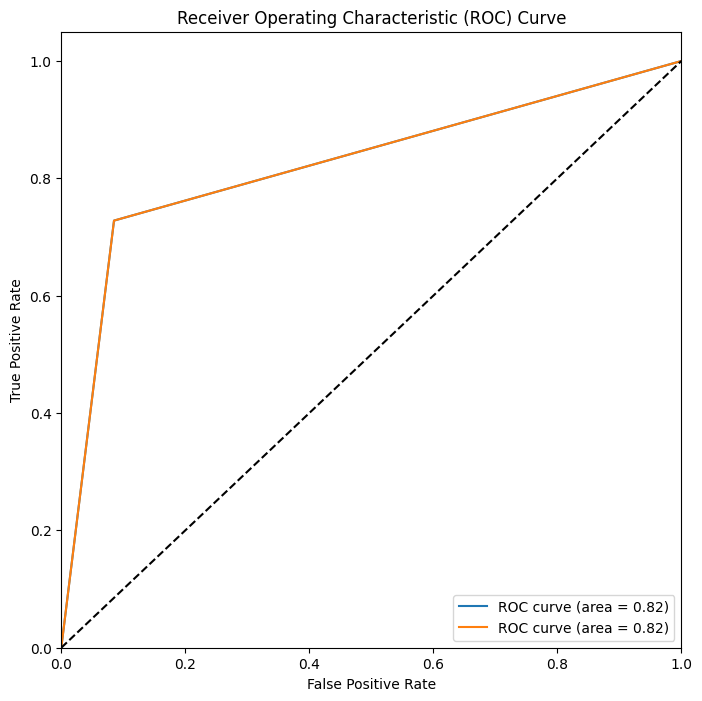

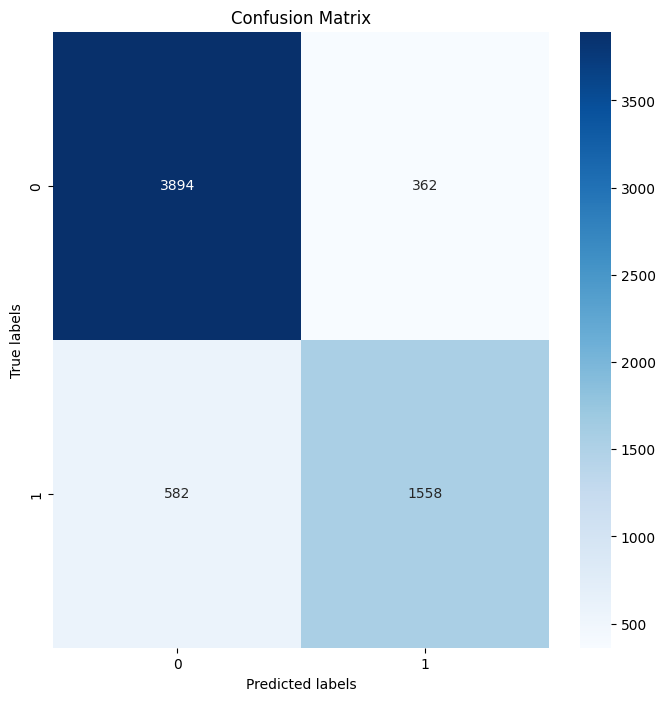

Max_abs Scaling
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4256
           1       0.80      0.77      0.78      2140

    accuracy                           0.86      6396
   macro avg       0.84      0.83      0.84      6396
weighted avg       0.86      0.86      0.86      6396

Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
Balanced Accuracy: 0.83
ROC AUC: 0.83


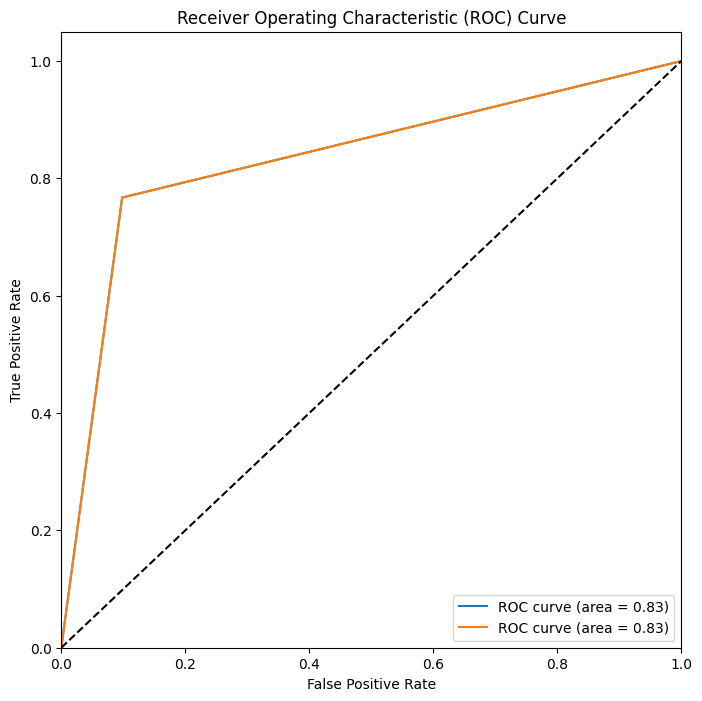

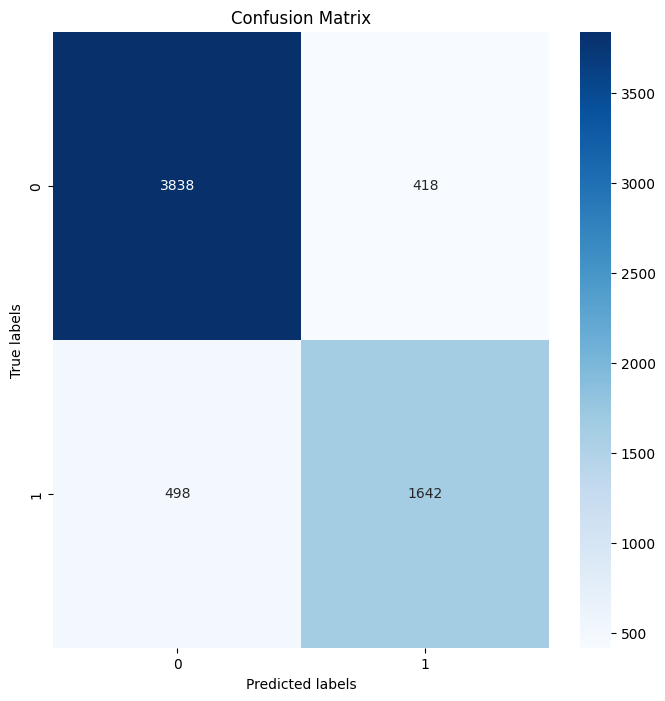

Robust Scaling
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4256
           1       0.78      0.78      0.78      2140

    accuracy                           0.85      6396
   macro avg       0.83      0.83      0.83      6396
weighted avg       0.85      0.85      0.85      6396

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Balanced Accuracy: 0.83
ROC AUC: 0.83


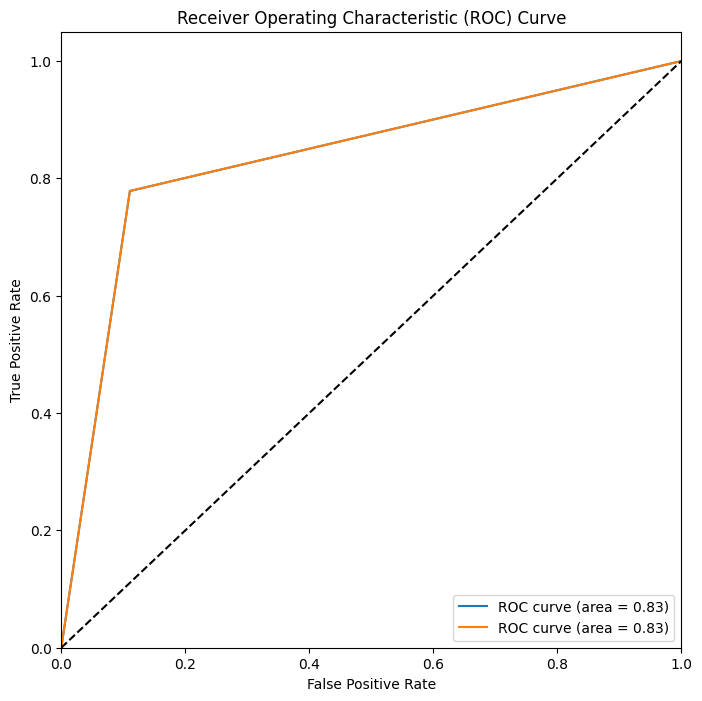

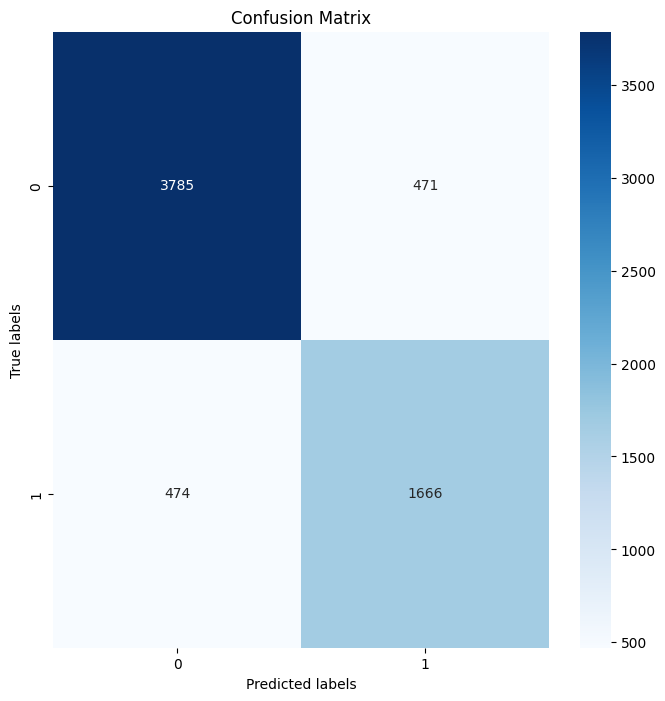

In [5]:
for scaler in scalers:
    # Scale the training and test sets
    X_train_scaled = scalers[scaler].fit_transform(X_train)
    X_test_scaled = scalers[scaler].transform(X_test)

    from sklearn.neural_network import MLPClassifier

    # Make model
    model_mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', 
                        alpha=0.0001, batch_size='auto', learning_rate='constant', 
                        learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, 
                        random_state=42, tol=0.0001, verbose=False, warm_start=False, 
                        momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                        validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                        n_iter_no_change=10, max_fun=15000)

    # Train model
    model_mlp.fit(X_train_scaled, y_train)

    # Use predict method on test data
    y_pred_mlp = model_mlp.predict(X_test_scaled)

    # Compute the classification report
    cr = classification_report(y_test, y_pred_mlp)
    print(f'{scaler.capitalize()} Scaling\n{cr}')

    # Compute the accuracy score
    accuracy = accuracy_score(y_test, y_pred_mlp)
    print(f'Accuracy: {accuracy:.2f}')

    # Compute the precision score
    precision = precision_score(y_test, y_pred_mlp, average='weighted')
    print(f'Precision: {precision:.2f}')

    # Compute the recall score
    recall = recall_score(y_test, y_pred_mlp, average='weighted')
    print(f'Recall: {recall:.2f}')

    # Compute the F1 score
    f1 = f1_score(y_test, y_pred_mlp, average='weighted')
    print(f'F1 Score: {f1:.2f}')

    # Compute the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred_mlp)
    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

    # Compute the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_mlp, average='weighted', multi_class='ovr')
    print(f'ROC AUC: {roc_auc:.2f}')

    # Compute the ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_mlp)
        roc_auc[i] = roc_auc_score(y_test, y_pred_mlp)
        
    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 8))
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc='lower right')
    plt.savefig(f'../reports/images/roc_curve_mlp_scaled_{scaler}.png')
    plt.show()

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_mlp)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.savefig(f'../reports/images/confusion_matrix_mlp_scaled_{scaler}.png')
    plt.show()